##Importações:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Funções Matemáticas
def softplus(x):
    return np.log(1 + np.exp(x))

def d_softplus(x):
    return np.exp(x) / (1 + np.exp(x))

##Atividade A:

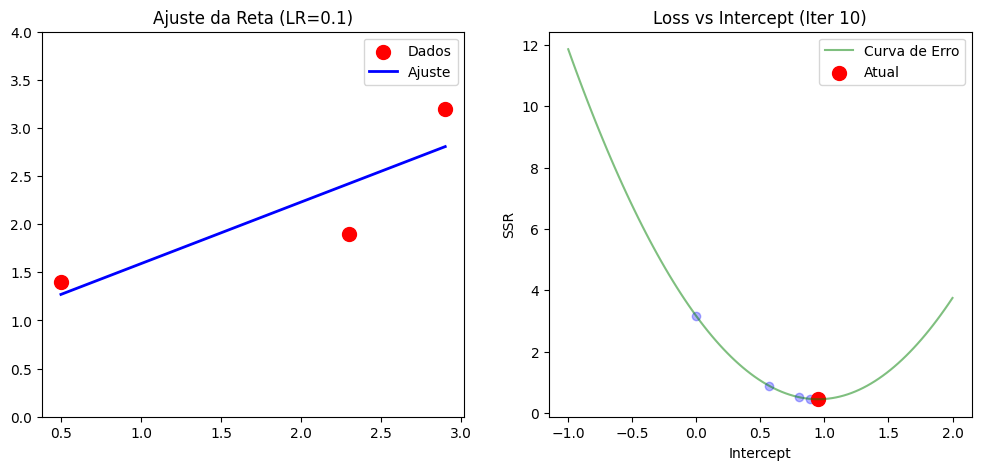


>>> Convergiu por Step Size mínimo na iteração 10


In [ ]:
# --- 1. Dados (Exemplo StatQuest: Peso vs Altura) ---
# X = Peso, Y = Altura
X = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# --- 2. Função para Rodar a Atividade A ---
def run_activity_a(learning_rate, slope_fixed=0.64):
    intercept = 0.0 # Começa do 0

    # Condições de Parada
    max_epochs = 100
    min_step_size = 0.0001

    # Histórico para plotagem
    intercept_history = []
    loss_history = []

    # Para desenhar a parábola de fundo (Loss Landscape)
    intercept_vals = np.linspace(-1, 2, 100)
    loss_vals = [np.sum((y - (slope_fixed * X + i))**2) for i in intercept_vals]

    print(f"\n{'='*60}")
    print(f"ATIVIDADE A | Learning Rate: {learning_rate}")
    print(f"{'='*60}")
    print(f"{'Iter':<5} | {'Old Intercept':<15} | {'Step Size':<12} | {'New Intercept':<15}")
    print("-" * 55)

    for i in range(max_epochs):
        # 1. Predição (y = mx + b)
        y_pred = (slope_fixed * X) + intercept

        # 2. Cálculo do Erro (SSR - Sum of Squared Residuals)
        loss = np.sum((y - y_pred)**2)

        intercept_history.append(intercept)
        loss_history.append(loss)

        # 3. Derivada (Gradiente)
        # dSSR/dIntercept = -2 * soma(y - y_pred)
        gradient = -2 * np.sum(y - y_pred)

        # 4. Step Size
        step_size = gradient * learning_rate

        # 5. Atualização
        old_intercept = intercept
        intercept = intercept - step_size

        # Prints Solicitados
        print(f"{i:<5} | {old_intercept:<15.4f} | {step_size:<12.4f} | {intercept:<15.4f}")

        # --- Plotagem Dinâmica ---
        clear_output(wait=True)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Gráfico 1: A Reta se ajustando aos dados
        ax1.scatter(X, y, color='red', s=100, label='Dados')
        ax1.plot(X, (slope_fixed * X) + intercept, color='blue', linewidth=2, label='Ajuste')
        ax1.set_title(f"Ajuste da Reta (LR={learning_rate})")
        ax1.set_ylim(0, 4)
        ax1.legend()

        # Gráfico 2: A Parábola (Descida do Gradiente) - Pedido no Slide 7
        ax2.plot(intercept_vals, loss_vals, color='green', alpha=0.5, label='Curva de Erro')
        ax2.scatter(intercept_history, loss_history, color='blue', alpha=0.3)
        ax2.scatter([intercept], [loss], color='red', s=100, label='Atual')
        ax2.set_title(f"Loss vs Intercept (Iter {i})")
        ax2.set_xlabel("Intercept")
        ax2.set_ylabel("SSR")
        ax2.legend()

        plt.show()

        # 6. Condições de Parada
        if abs(step_size) < min_step_size:
            print(f"\n>>> Convergiu por Step Size mínimo na iteração {i}")
            break

    if i == max_epochs - 1:
        print("\n>>> Parou por Máximo de Iterações")

# --- EXECUÇÃO: Testando DUAS Learning Rates ---
# Teste 1: Learning Rate Moderada
run_activity_a(learning_rate=0.01)
time.sleep(2) # Pausa para ver o resultado

# Teste 2: Learning Rate Alta (ou muito baixa) para comparar
# Nota: Se for muito alta pode explodir (divergir)
run_activity_a(learning_rate=0.1)

##Atividade B:

In [ ]:
# --- 1. Dados ---
X = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# --- 2. Configuração ---
learning_rate = 0.01
max_epochs = 1000
min_step_size = 0.0001

# Inicialização (Intercept=0, Slope=1)
intercept = 0.0
slope = 1.0

print(f"\n{'='*60}")
print(f"ATIVIDADE B - Otimizando Slope e Intercept")
print(f"{'='*60}")
print(f"{'Iter':<5} | {'Slope':<10} | {'Intercept':<10} | {'Step Slope':<12} | {'Step Int.':<12}")
print("-" * 65)

for i in range(max_epochs):
    # 1. Predição
    y_pred = (slope * X) + intercept

    # 2. Cálculo do Erro
    loss = np.sum((y - y_pred)**2)

    # 3. Derivadas (Gradiente para 2 parâmetros)
    grad_intercept = -2 * np.sum(y - y_pred)
    grad_slope = -2 * np.sum((y - y_pred) * X)

    # 4. Steps
    step_intercept = grad_intercept * learning_rate
    step_slope = grad_slope * learning_rate

    # 5. Atualização
    old_slope = slope
    old_intercept = intercept

    intercept = intercept - step_intercept
    slope = slope - step_slope

    # Print a cada 10 iterações
    if i % 5 == 0:
        print(f"{i:<5} | {slope:<10.4f} | {intercept:<10.4f} | {step_slope:<12.4f} | {step_intercept:<12.4f}")

    # --- Plotagem Sem a Parábola, apenas a Reta ---
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    plt.scatter(X, y, color='red', s=100, label='Dados')

    # Criar linha para o plot
    x_range = np.linspace(0, 3.5, 10)
    plt.plot(x_range, slope * x_range + intercept, color='blue', linewidth=2, label=f'Iter {i}')

    plt.title(f"Atividade B: Regressão Linear Completa\nSlope={slope:.2f}, Intercept={intercept:.2f}")
    plt.ylim(0, 4)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 6. Condições de Parada (Se AMBOS os passos forem pequenos)
    if abs(step_intercept) < min_step_size and abs(step_slope) < min_step_size:
        print(f"\n>>> Convergiu na iteração {i}!")
        print(f"Final -> Slope: {slope:.4f}, Intercept: {intercept:.4f}")
        break

KeyboardInterrupt: 

##Atividade D:

In [ ]:
# --- Configuração Inicial Atividade D ---
input_dosage = 0.5
target_efficacy = 1.0

# Pesos Iniciais (Primeira Versão com 2 Parâmetros)
w1, b1 = 3.34, -1.43
w2, b2 = -3.53, 0.39
w3, w4 = -1.22, -2.30
b3 = 0.0  # Começando do zero
learning_rate = 0.1

# Função de Predição
def predict(x, current_b3):
    n1 = softplus(x * w1 + b1)
    n2 = softplus(x * w2 + b2)
    return (n1 * w3) + (n2 * w4) + current_b3

# --- Loop de Treinamento ---
print("=" * 60)
print("ATIVIDADE D - Treinamento com 1 parâmetro (b3)")
print("=" * 60)
print(f"Dosagem: {input_dosage}, Target: {target_efficacy}")
print(f"Pesos fixos: w1={w1}, b1={b1}, w2={w2}, b2={b2}")
print(f"            w3={w3}, w4={w4}")
print(f"Parâmetro treinável: b3 (inicial={b3})")
print(f"Learning rate: {learning_rate}")
print("-" * 60)

print("\n{:^6s} | {:^10s} | {:^10s} | {:^10s} | {:^10s}".format(
    "Step", "b3", "Pred", "Loss", "Grad"))
print("-" * 55)

for step in range(20):
    # Forward pass
    current_pred = predict(input_dosage, b3)
    loss = (target_efficacy - current_pred) ** 2

    # Backpropagation (gradiente apenas para b3)
    gradient = -2 * (target_efficacy - current_pred) * 1  # dLoss/db3

    # Atualização
    b3_old = b3
    b3 = b3 - (gradient * learning_rate)

    # Exibição
    print("{:6d} | {:10.6f} | {:10.6f} | {:10.6f} | {:10.6f}".format(
        step, b3_old, current_pred, loss, gradient))

    # Condição de parada
    if loss < 0.0001:
        print(f"\n✓ Convergência alcançada na iteração {step}!")
        break

print("=" * 60)
print(f"Valor final de b3: {b3:.6f}")
print(f"Predição final: {predict(input_dosage, b3):.6f}")
print(f"Loss final: {(target_efficacy - predict(input_dosage, b3))**2:.6f}")

ATIVIDADE D - Treinamento com 1 parâmetro (b3)
Dosagem: 0.5, Target: 1.0
Pesos fixos: w1=3.34, b1=-1.43, w2=-3.53, b2=0.39
            w3=-1.22, w4=-2.3
Parâmetro treinável: b3 (inicial=0.0)
Learning rate: 0.1
------------------------------------------------------------

 Step  |     b3     |    Pred    |    Loss    |    Grad   
-------------------------------------------------------
     0 |   0.000000 |  -1.519252 |   6.346629 |  -5.038503
     1 |   0.503850 |  -1.015401 |   4.061843 |  -4.030803
     2 |   0.906931 |  -0.612321 |   2.599579 |  -3.224642
     3 |   1.229395 |  -0.289857 |   1.663731 |  -2.579714
     4 |   1.487366 |  -0.031885 |   1.064788 |  -2.063771
     5 |   1.693743 |   0.174492 |   0.681464 |  -1.651017
     6 |   1.858845 |   0.339593 |   0.436137 |  -1.320813
     7 |   1.990926 |   0.471675 |   0.279128 |  -1.056651
     8 |   2.096591 |   0.577340 |   0.178642 |  -0.845321
     9 |   2.181123 |   0.661872 |   0.114331 |  -0.676256
    10 |   2.248749 |  

##Atividade E:

In [ ]:
# --- Atividade E - Treinando 3 Parâmetros ---
print("=" * 60)
print("ATIVIDADE E - Treinamento com 3 parâmetros (b3, w3, w4)")
print("=" * 60)

# Reset dos parâmetros
b3 = 0.0
w3 = -1.22
w4 = -2.30
learning_rate = 0.1

print(f"Parâmetros iniciais: b3={b3}, w3={w3}, w4={w4}")
print("-" * 60)

print("\n{:^6s} | {:^8s} | {:^8s} | {:^8s} | {:^10s} | {:^10s}".format(
    "Step", "b3", "w3", "w4", "Pred", "Loss"))
print("-" * 65)

for step in range(50):
    # Forward pass
    n1 = softplus(input_dosage * w1 + b1)
    n2 = softplus(input_dosage * w2 + b2)
    current_pred = (n1 * w3) + (n2 * w4) + b3
    loss = (target_efficacy - current_pred) ** 2

    # Backpropagation para os 3 parâmetros
    # dLoss/db3
    dL_db3 = -2 * (target_efficacy - current_pred) * 1

    # dLoss/dw3
    dL_dw3 = -2 * (target_efficacy - current_pred) * n1

    # dLoss/dw4
    dL_dw4 = -2 * (target_efficacy - current_pred) * n2

    # Atualização dos parâmetros
    b3 = b3 - (dL_db3 * learning_rate)
    w3 = w3 - (dL_dw3 * learning_rate)
    w4 = w4 - (dL_dw4 * learning_rate)

    # Exibição a cada 5 passos
    if step % 5 == 0:
        print("{:6d} | {:8.4f} | {:8.4f} | {:8.4f} | {:10.6f} | {:10.6f}".format(
            step, b3, w3, w4, current_pred, loss))

    # Condição de parada
    if loss < 0.0001:
        print(f"\n✓ Convergência alcançada na iteração {step}!")
        print(f"Parâmetros finais: b3={b3:.6f}, w3={w3:.6f}, w4={w4:.6f}")
        print(f"Predição final: {current_pred:.6f}")
        print(f"Loss final: {loss:.6f}")
        break

if loss > 0.0001:
    print(f"\nÚltima iteração ({step}):")
    print(f"Parâmetros: b3={b3:.6f}, w3={w3:.6f}, w4={w4:.6f}")
    print(f"Predição: {current_pred:.6f}")
    print(f"Loss: {loss:.6f}")

print("=" * 60)

ATIVIDADE E - Treinamento com 3 parâmetros (b3, w3, w4)
Parâmetros iniciais: b3=0.0, w3=-1.22, w4=-2.3
------------------------------------------------------------

 Step  |    b3    |    w3    |    w4    |    Pred    |    Loss   
-----------------------------------------------------------------
     0 |   0.5039 |  -0.8067 |  -2.1864 |  -1.519252 |   6.346629
     5 |   1.3458 |  -0.1160 |  -1.9966 |   0.695698 |   0.092600
    10 |   1.4475 |  -0.0326 |  -1.9737 |   0.963243 |   0.001351

✓ Convergência alcançada na iteração 14!
Parâmetros finais: b3=1.458917, w3=-0.023206, w4=-1.971142
Predição final: 0.993224
Loss final: 0.000046


##Exibição dos Graficos:

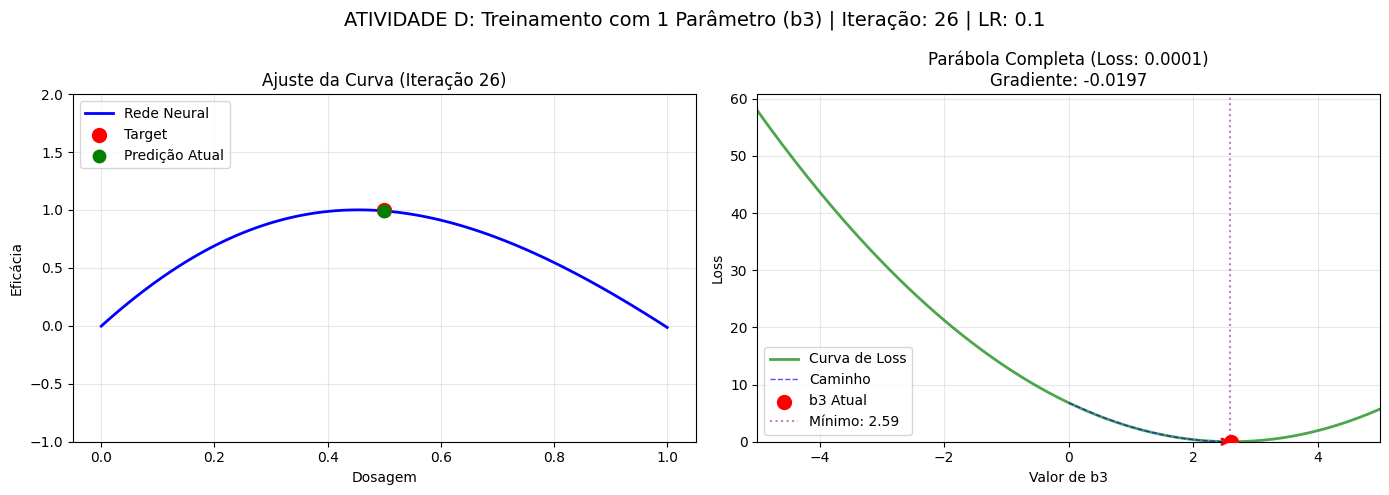

Iteração: 26
b3 atual: 2.599163 (ótimo: 2.587940)
Predição: 0.990143 (target: 1.0)
Loss: 0.000097 (mínimo teórico: 0.000444)
Gradiente: -0.019713
Distância ao mínimo: 0.011223
------------------------------------------------------------

************************************************************
✓ Loss < 0.0001
✓ Valor final de b3: 2.601134
✓ Erro: 0.013194
************************************************************

ANIMAÇÃO DO GRAFICO CONCLUÍDA!

RESUMO FINAL:
Valor inicial de b3: 0.000000
Valor final de b3: 2.599163
Valor ótimo teórico: 2.587940
Predição final: 0.992115
Loss final: 0.000097
Número de iterações: 26


In [ ]:
# --- Configuração Inicial da Animação ---
input_dosage = 0.5
target_efficacy = 1.0

# Pesos Iniciais (reset)
w1, b1 = 3.34, -1.43
w2, b2 = -3.53, 0.57
w3, w4 = -1.22, -2.30
b3 = 0.0  # Começando do zero
learning_rate = 0.1

# Função de Predição
def predict(x, current_b3):
    n1 = softplus(x * w1 + b1)
    n2 = softplus(x * w2 + b2)
    return (n1 * w3) + (n2 * w4) + current_b3

# --- Prepara o cenário do Loss ---
b3_vals = np.linspace(-5, 5, 200)
loss_vals = []
for val in b3_vals:
    pred = predict(input_dosage, val)
    loss = (target_efficacy - pred)**2
    loss_vals.append(loss)

# Para desenhar a curva azul
x_range = np.linspace(0, 1, 100)

# Histórico para traçar o caminho
b3_history = []
loss_history = []

# Encontrar o mínimo teórico (para referência)
min_loss_idx = np.argmin(loss_vals)
b3_optimal = b3_vals[min_loss_idx]
min_loss = loss_vals[min_loss_idx]

# --- Loop de Treinamento com Animação (Só apaga e mostra o proximo #animaçãoDePromptkk) ---
print("Iniciando animação no Colab...")
print("A animação mostrará o ajuste da curva e a descida do gradiente.")
print(f"Mínimo teórico da parábola: b3 ≈ {b3_optimal:.4f}, Loss ≈ {min_loss:.6f}")
print("Pressione STOP no Colab para interromper a animação.\n")

for i in range(100): # Faremos 100 quadros
    # 1. Cálculos (Matemática da Rede)
    current_pred = predict(input_dosage, b3)
    loss = (target_efficacy - current_pred) ** 2

    # Armazena histórico
    b3_history.append(b3)
    loss_history.append(loss)

    # Backprop (apenas para b3 na animação)
    gradient = -2 * (target_efficacy - current_pred) * 1
    b3 = b3 - (gradient * learning_rate)

    # 2. Plotagem (Atualiza a cada iteração)
    clear_output(wait=True)

    # Criar a figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # --- Gráfico 1: A Curva ---
    # Linha azul (Rede atual)
    y_preds = [predict(x, b3) for x in x_range]
    ax1.plot(x_range, y_preds, 'b-', lw=2, label='Rede Neural')

    # Ponto vermelho (Target)
    ax1.scatter([input_dosage], [target_efficacy], c='r', s=100, label='Target', zorder=5)

    # Ponto verde (Predição atual)
    ax1.scatter([input_dosage], [current_pred], c='g', s=80, label='Predição Atual', zorder=5)

    ax1.set_ylim(-1, 2)
    ax1.set_xlabel('Dosagem')
    ax1.set_ylabel('Eficácia')
    ax1.set_title(f'Ajuste da Curva (Iteração {i+1})')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)


    # --- Gráfico 2: O Gradiente (PARÁBOLA COMPLETA) ---
    ax2.plot(b3_vals, loss_vals, 'g-', alpha=0.7, label='Curva de Loss', lw=2)
    ax2.plot(b3_history, loss_history, 'b--', alpha=0.7, label='Caminho', lw=1)
    ax2.scatter([b3_history[-1]], [loss_history[-1]], c='r', s=100, label='b3 Atual', zorder=5)

    # Marcar mínimo teórico
    ax2.axvline(x=b3_optimal, color='purple', linestyle=':', alpha=0.5, label=f'Mínimo: {b3_optimal:.2f}')

    # Setas indicando direção (CORRIGIDO: ax3 -> ax2)
    if len(b3_history) > 1:
        dx = b3_history[-1] - b3_history[-2]
        if dx != 0:
            arrow_color = 'green' if dx < 0 else 'red'
            ax2.annotate('', xy=(b3_history[-1], loss_history[-1]),
                        xytext=(b3_history[-2], loss_history[-2]),
                        arrowprops=dict(arrowstyle='->', color=arrow_color, lw=2))

    ax2.set_xlabel('Valor de b3')
    ax2.set_ylabel('Loss')
    ax2.set_title(f'Parábola Completa (Loss: {loss:.4f})\nGradiente: {gradient:.4f}')
    ax2.set_xlim(-5, 5)  # Zoom out para ver toda a parábola
    ax2.set_ylim(0, max(loss_vals) * 1.05)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.suptitle(f'ATIVIDADE D: Treinamento com 1 Parâmetro (b3) | Iteração: {i+1} | LR: {learning_rate}', fontsize=14)
    plt.tight_layout()
    plt.show() # Mostra o frame atual

    # Exibe informações textuais
    print(f"Iteração: {i+1}")
    print(f"b3 atual: {b3_history[-1]:.6f} (ótimo: {b3_optimal:.6f})")
    print(f"Predição: {current_pred:.6f} (target: {target_efficacy})")
    print(f"Loss: {loss:.6f} (mínimo teórico: {min_loss:.6f})")
    print(f"Gradiente: {gradient:.6f}")
    print(f"Distância ao mínimo: {abs(b3_history[-1] - b3_optimal):.6f}")
    print("-" * 60)

    # Condição de parada visual
    if loss < 0.0001:
        print("\n" + "*"*60)
        print("✓ Loss < 0.0001")
        print(f"✓ Valor final de b3: {b3:.6f}")
        print(f"✓ Erro: {abs(b3 - b3_optimal):.6f}")
        print("*"*60)
        break

    # Pequena pausa para você conseguir ver a animação acontecendo
    time.sleep(0.15)

print("\n" + "="*60)
print("ANIMAÇÃO DO GRAFICO CONCLUÍDA!")
print("="*60)
print(f"\nRESUMO FINAL:")
print(f"Valor inicial de b3: 0.000000")
print(f"Valor final de b3: {b3_history[-1]:.6f}")
print(f"Valor ótimo teórico: {b3_optimal:.6f}")
print(f"Predição final: {predict(input_dosage, b3):.6f}")
print(f"Loss final: {loss_history[-1]:.6f}")
print(f"Número de iterações: {len(b3_history)}")
print("="*60)